## Хід виконання роботи

##### Практична робота №3 

1) Виберіть техніку моделювання для вирішення проблеми вашого підприємства.
2) Складіть звіт моделювання та опишіть припущення для обраних моделей.
3) Виберіть декілька метрик для ваших моделей з  попередньої практичної та обґрунтуйте свій вибір.
4) Виберіть метод поділу даних на навчальні та тестові. Опишіть основи такого рішення.
5) Здійсніть тренування обраних моделей на даних вашого підприємства.
6) Здійсніть валідацію моделей на основі обраних метрик та поділу даних.
7) Оберіть найкращу модель.




## Індивідуальне завдання

##### 6 варіант https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task

Опис Компанії-Замовника: HSBC Holdings plc: Міжнародний банківський конгломерат, який активно використовує цифровий маркетинг та персоналізовані кампанії для просування своїх продуктів.

Запит: Банк шукає способи для підвищення результативності своїх маркетингових кампаній, зокрема в контексті залучення клієнтів до нових банківських продуктів.

Пропозиція Реалізації: Розробка класифікаційної моделі машинного навчання для прогнозування реакції потенційних клієнтів на різні маркетингові ініціативи. Вона повинна оцінювати ефективність різних підходів, враховуючи демографічні дані клієнтів, їхню історію взаємодій з банком, а також відгуки на попередні рекламні акції. Це допоможе банку більш цілеспрямовано підходити до своїх клієнтів, збільшуючи ефективність маркетингових заходів та залучення нових клієнтів.

Додаю всі бібліотеки, які будуть застосовуватися

In [36]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import metrics

In [37]:
ds = pd.read_csv("D:\\3Kurs\\1Sem\\SS\\DataSet\\variant_6_cleaned.csv")
ds.head()
# ds.nunique()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,0.000000,0.0,0.344313,0.600000,0.015483,0.000000,0.161765,0.059011,0.04,0.00,...,1,0,1,0,1,0,0,0,0,0
1,0.090909,0.0,0.636877,0.333333,0.293962,0.627306,0.205882,0.171451,0.04,0.16,...,0,1,1,0,0,1,0,1,0,0
2,0.181818,0.5,0.301725,0.500000,0.060164,0.610701,0.235294,0.143541,0.04,0.04,...,0,1,1,0,0,0,1,1,0,0
3,0.181818,0.0,0.314004,0.066667,0.106835,0.000000,0.161765,0.154705,0.16,0.00,...,0,1,0,0,0,0,1,0,0,0
4,0.272727,0.0,0.170159,0.133333,0.293962,0.000000,0.588235,0.176236,0.04,0.00,...,0,1,0,0,0,1,0,0,0,0


In [38]:
ds.describe()

,job,marital,balance,day,month,pdays,age_median,duration_end_of_distribution_imputation,campaign_0,previous_mean,...,housing_no,housing_yes,contact_cellular,contact_telephone,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.00000,4224.000000,4224.000000,4224.000000,4224.000000,...,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,0.384190,0.244792,0.272599,0.498114,0.161009,0.07255,0.322917,0.177629,0.109280,0.021856,...,0.393466,0.521070,0.626657,0.064157,0.136127,0.461174,0.265388,0.106297,0.043324,0.027936
std,0.249195,0.347306,0.157073,0.275491,0.097086,0.17685,0.150299,0.175884,0.117579,0.067784,...,0.488577,0.499615,0.483749,0.245062,0.342964,0.498549,0.441592,0.308254,0.203609,0.164808
min,0.000000,0.000000,0.000000,0.000000,0.003318,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.176201,0.266667,0.076753,0.00000,0.205882,0.058214,0.040000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.000000,0.211334,0.500000,0.131166,0.00000,0.294118,0.125997,0.080000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.545455,0.500000,0.299142,0.666667,0.293962,0.00000,0.426471,0.234450,0.120000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.293962,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
ds['y_yes'].value_counts()

y_yes
0.0    3774
1.0     450
Name: count, dtype: int64

In [40]:
ds.columns

Index(['job', 'marital', 'balance', 'day', 'month', 'pdays', 'age_median',
       'duration_end_of_distribution_imputation', 'campaign_0',
       'previous_mean', 'default_yes', 'y_yes', 'loan_imputed_yes',
       'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone',
       'education_primary', 'education_secondary', 'education_tertiary',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [41]:
X = ds.drop(['y_yes'], axis=1)
y= ds['y_yes']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Let's train logistic regression with default parameters

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1128
         1.0       0.67      0.24      0.36       140

    accuracy                           0.90      1268
   macro avg       0.79      0.61      0.65      1268
weighted avg       0.89      0.90      0.88      1268



In [44]:
# Let's train SVC with default parameters

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      1128
         1.0       0.75      0.13      0.22       140

    accuracy                           0.90      1268
   macro avg       0.83      0.56      0.58      1268
weighted avg       0.89      0.90      0.87      1268



In [45]:
# Let's train GaussianNB with default parameters

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1128
         1.0       0.36      0.41      0.38       140

    accuracy                           0.86      1268
   macro avg       0.64      0.66      0.65      1268
weighted avg       0.86      0.86      0.86      1268



In [46]:
# Let's train SGDClassifier with default parameters

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred = sgd_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.94      1128
         1.0       0.62      0.18      0.28       140

    accuracy                           0.90      1268
   macro avg       0.77      0.58      0.61      1268
weighted avg       0.88      0.90      0.87      1268



In [47]:
# Let's train KNeighborsClassifier with default parameters

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1128
         1.0       0.54      0.14      0.22       140

    accuracy                           0.89      1268
   macro avg       0.72      0.56      0.58      1268
weighted avg       0.86      0.89      0.86      1268



In [48]:
# Let's train DecisionTreeClassifier with default parameters

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1128
         1.0       0.41      0.41      0.41       140

    accuracy                           0.87      1268
   macro avg       0.67      0.67      0.67      1268
weighted avg       0.87      0.87      0.87      1268



In [49]:
# Let's train RandomForestClassifier with default parameters

rf_classifier_with_no_def_parameters = RandomForestClassifier()
rf_classifier_with_no_def_parameters.fit(X_train, y_train)
y_pred = rf_classifier_with_no_def_parameters.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1128
         1.0       0.74      0.26      0.39       140

    accuracy                           0.91      1268
   macro avg       0.83      0.63      0.67      1268
weighted avg       0.90      0.91      0.89      1268



In [50]:
# Let's train RandomForestClassifier with non-default parameters

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 20)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      1128
         1.0       0.60      0.21      0.32       140

    accuracy                           0.90      1268
   macro avg       0.75      0.60      0.63      1268
weighted avg       0.88      0.90      0.88      1268



In [51]:
# Let's train GradientBoostingClassifier with default parameters

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1128
         1.0       0.57      0.32      0.41       140

    accuracy                           0.90      1268
   macro avg       0.74      0.65      0.68      1268
weighted avg       0.88      0.90      0.89      1268



In [52]:
# Get feature importances
importances = rf_classifier_with_no_def_parameters.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. duration_end_of_distribution_imputation (0.236454)
2. balance (0.108535)
3. age_median (0.097809)
4. day (0.094420)
5. month (0.085534)
6. job (0.059115)
7. pdays (0.049640)
8. poutcome_success (0.044185)
9. campaign_0 (0.041268)
10. previous_mean (0.029267)
11. marital (0.029014)
12. education_tertiary (0.016049)
13. contact_cellular (0.015325)
14. education_secondary (0.015201)
15. housing_no (0.015134)
16. housing_yes (0.013689)
17. loan_imputed_yes (0.010529)
18. poutcome_failure (0.009772)
19. education_primary (0.009335)
20. contact_telephone (0.007953)
21. poutcome_other (0.006715)
22. default_yes (0.005058)


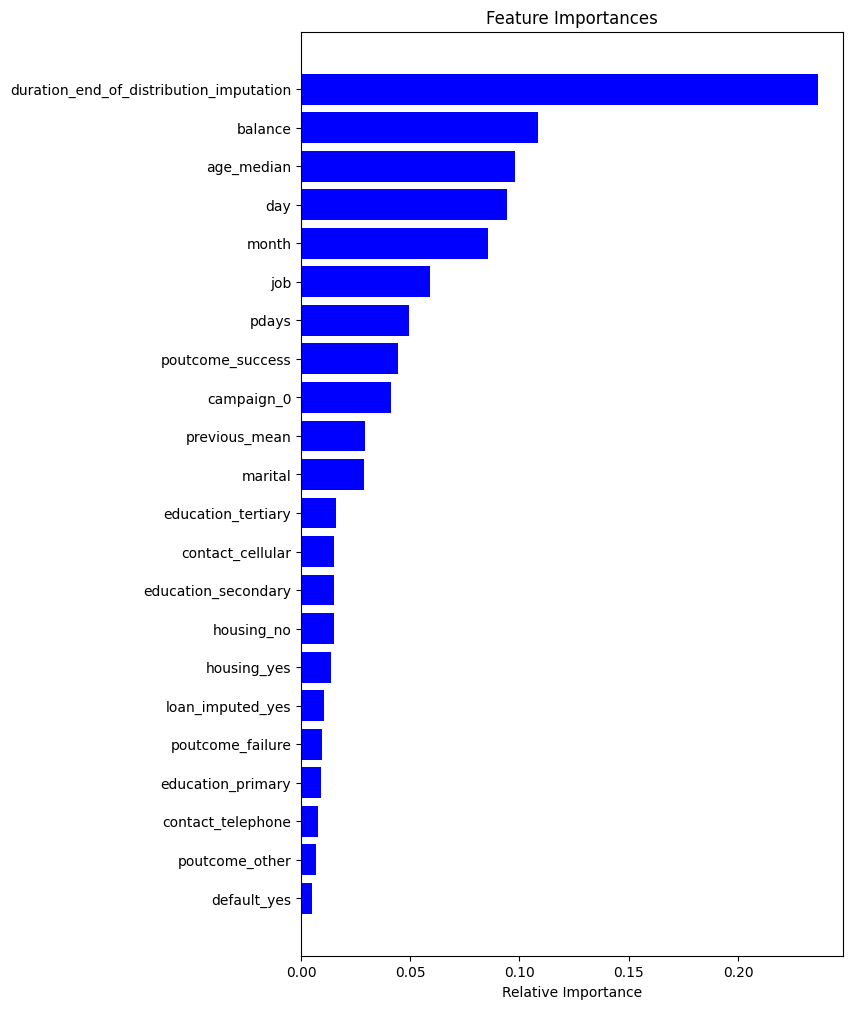

In [53]:
importances = rf_classifier_with_no_def_parameters.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [54]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(rf_classifier_with_no_def_parameters, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. duration_end_of_distribution_imputation (0.023028)
2. month (0.008833)
3. poutcome_success (0.008360)
4. contact_cellular (0.005047)
5. age_median (0.005047)
6. pdays (0.003312)
7. balance (0.002208)
8. housing_no (0.002208)
9. marital (0.002050)
10. education_secondary (0.002050)
11. day (0.002050)
12. job (0.001577)
13. loan_imputed_yes (0.001420)
14. poutcome_other (0.001104)
15. campaign_0 (0.000946)
16. poutcome_failure (0.000789)
17. education_primary (0.000158)
18. default_yes (0.000000)
19. contact_telephone (-0.000473)
20. education_tertiary (-0.000473)
21. previous_mean (-0.000946)
22. housing_yes (-0.001420)


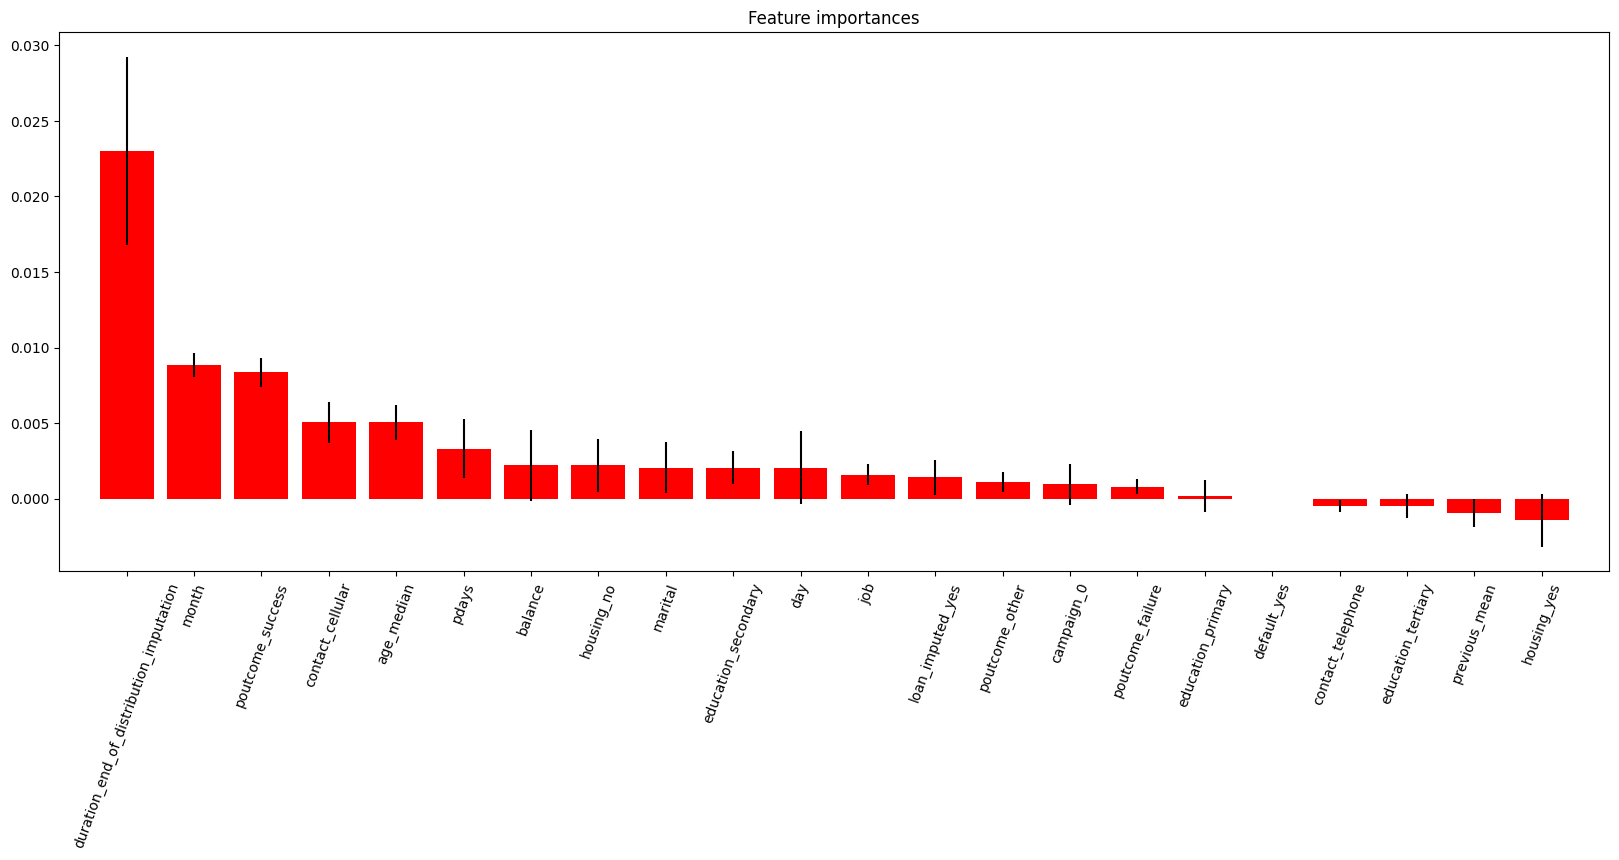

In [55]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [56]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, stratify=y, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, stratify=y_rem, random_state=0)

In [57]:
# just for example of validation set usage
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

params = {
    # Parameters that we are going to tune.
    'max_depth':10,
    'eta':.5,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    # Other parameters
    'objective':'binary:logistic',
}
params['eval_metric'] = "auc"
num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtrain, "Train"),(dvalid, "Test")],
    early_stopping_rounds=50,
)

y_pred = model.predict(dtest)> 0.5
print(y_pred[:-10])
print('test set metrics: ', metrics.classification_report(y_test, y_pred))


[0]	Train-auc:0.91230	Test-auc:0.83708
[1]	Train-auc:0.94306	Test-auc:0.83578
[2]	Train-auc:0.96557	Test-auc:0.84492
[3]	Train-auc:0.97982	Test-auc:0.83908
[4]	Train-auc:0.98820	Test-auc:0.84884
[5]	Train-auc:0.98955	Test-auc:0.85561
[6]	Train-auc:0.99221	Test-auc:0.85824
[7]	Train-auc:0.99479	Test-auc:0.85523
[8]	Train-auc:0.99658	Test-auc:0.85511
[9]	Train-auc:0.99720	Test-auc:0.85240
[10]	Train-auc:0.99779	Test-auc:0.85152
[11]	Train-auc:0.99884	Test-auc:0.85152
[12]	Train-auc:0.99900	Test-auc:0.85847
[13]	Train-auc:0.99947	Test-auc:0.85836
[14]	Train-auc:0.99963	Test-auc:0.85547
[15]	Train-auc:0.99975	Test-auc:0.85665
[16]	Train-auc:0.99983	Test-auc:0.85989
[17]	Train-auc:0.99993	Test-auc:0.85724
[18]	Train-auc:0.99997	Test-auc:0.85883
[19]	Train-auc:0.99998	Test-auc:0.85794
[20]	Train-auc:0.99999	Test-auc:0.85718
[21]	Train-auc:1.00000	Test-auc:0.86024
[22]	Train-auc:0.99999	Test-auc:0.85824
[23]	Train-auc:1.00000	Test-auc:0.85782
[24]	Train-auc:1.00000	Test-auc:0.85912
[25]	Train

In [58]:
models = { 'RandomForestClassifier' : RandomForestClassifier(), 'GradientBoostingClassifier' : GradientBoostingClassifier() }

In [59]:
classifiers = dict()
for name, model in models.items():
    print('training ',name)
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('test set metrics: ', metrics.classification_report(y_test, y_pred))
    y_pred = classifier.predict(X_valid)
    print('validation set metrics: ', metrics.classification_report(y_valid, y_pred))
    classifiers[name] = classifier


training  RandomForestClassifier


test set metrics:                precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       378
         1.0       0.69      0.24      0.36        45

    accuracy                           0.91       423
   macro avg       0.80      0.62      0.66       423
weighted avg       0.89      0.91      0.89       423

validation set metrics:                precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       377
         1.0       0.62      0.18      0.28        45

    accuracy                           0.90       422
   macro avg       0.76      0.58      0.61       422
weighted avg       0.88      0.90      0.88       422

training  GradientBoostingClassifier
test set metrics:                precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       378
         1.0       0.70      0.31      0.43        45

    accuracy                           0.91       423
   macro avg       0.81     

# K-fold validation

In [60]:
from numpy import array
from sklearn.model_selection import KFold


# split train/test data
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)


# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# enumerate splits
for train, test in kfold.split(X_train):
    classifier = GradientBoostingClassifier()
    classifier.fit(X_train.iloc[train], y_train.iloc[train])
    y_pred = classifier.predict(X_train.iloc[test])
    print('k-fold set metrics: ', metrics.classification_report(y_train.iloc[test], y_pred))

y_pred = classifier.predict(X_test)    
print('test set metrics: ', metrics.classification_report(y_test, y_pred))


k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       610
         1.0       0.60      0.27      0.38        66

    accuracy                           0.91       676
   macro avg       0.76      0.63      0.66       676
weighted avg       0.89      0.91      0.90       676

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       601
         1.0       0.65      0.35      0.45        75

    accuracy                           0.91       676
   macro avg       0.79      0.66      0.70       676
weighted avg       0.89      0.91      0.89       676

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       612
         1.0       0.46      0.34      0.39        64

    accuracy                           0.90       676
   macro avg       0.70      0.65      0.67       676
weighted av

In [61]:
from numpy import array
from sklearn.model_selection import KFold


# split train/test data
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)


# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# enumerate splits
for train, test in kfold.split(X_train):
    classifier = RandomForestClassifier()
    classifier.fit(X_train.iloc[train], y_train.iloc[train])
    y_pred = classifier.predict(X_train.iloc[test])
    print('k-fold set metrics: ', metrics.classification_report(y_train.iloc[test], y_pred))

y_pred = classifier.predict(X_test)    
print('test set metrics: ', metrics.classification_report(y_test, y_pred))


k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       602
         1.0       0.67      0.19      0.29        74

    accuracy                           0.90       676
   macro avg       0.79      0.59      0.62       676
weighted avg       0.88      0.90      0.88       676

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       601
         1.0       0.68      0.31      0.42        75

    accuracy                           0.91       676
   macro avg       0.80      0.64      0.69       676
weighted avg       0.89      0.91      0.89       676

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       607
         1.0       0.64      0.26      0.37        69

    accuracy                           0.91       676
   macro avg       0.78      0.62      0.66       676
weighted av

# Random permutations cross-validation

In [62]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in ss.split(X):
    classifier = RandomForestClassifier()
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('k-fold set metrics: ', metrics.classification_report(y.iloc[test_index], y_pred))

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       745
         1.0       0.74      0.25      0.37       100

    accuracy                           0.90       845
   macro avg       0.82      0.62      0.66       845
weighted avg       0.89      0.90      0.88       845

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       735
         1.0       0.78      0.19      0.31       110

    accuracy                           0.89       845
   macro avg       0.83      0.59      0.62       845
weighted avg       0.88      0.89      0.86       845

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       756
         1.0       0.57      0.27      0.37        89

    accuracy                           0.90       845
   macro avg       0.75      0.62      0.66       845
weighted av

In [63]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in ss.split(X):
    classifier = GradientBoostingClassifier()
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('k-fold set metrics: ', metrics.classification_report(y.iloc[test_index], y_pred))

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       745
         1.0       0.59      0.26      0.36       100

    accuracy                           0.89       845
   macro avg       0.75      0.62      0.65       845
weighted avg       0.87      0.89      0.87       845

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       735
         1.0       0.65      0.34      0.44       110

    accuracy                           0.89       845
   macro avg       0.78      0.65      0.69       845
weighted avg       0.87      0.89      0.87       845

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       756
         1.0       0.53      0.28      0.37        89

    accuracy                           0.90       845
   macro avg       0.73      0.63      0.66       845
weighted av

[[376   2]
 [  8  37]]


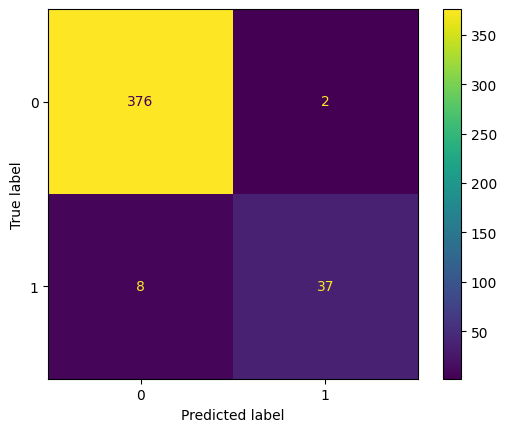

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
dt_classifier = RandomForestClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

[[373   5]
 [ 26  19]]


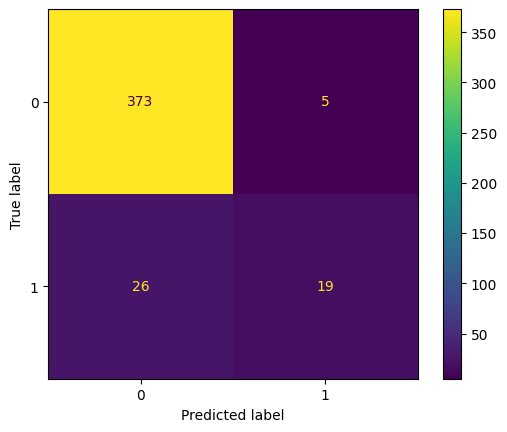

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()